In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
#read the csv file into pandas DataFrame
data =pd.read_csv(r'C:\file location\average_salary_jobs_sex_years.csv')
#show top 10 and notice the structure
data.head(10) 

,index,job,sector,sex,2015,2016,2017
0,110.0,Commissioned armed forces officers,private sector and public enterprises,Males,NaN,NaN,NaN
1,NaN,NaN,NaN,Females,NaN,NaN,NaN
2,NaN,NaN,local government,Males,NaN,NaN,NaN
3,NaN,NaN,NaN,Females,NaN,NaN,NaN
4,NaN,NaN,central government,Males,56700.0,57100.0,60260.0
5,NaN,NaN,NaN,Females,47600.0,48600.0,51660.0
6,210.0,Non-commissioned armed forces officers,private sector and public enterprises,Males,NaN,NaN,NaN
7,NaN,NaN,NaN,Females,NaN,NaN,NaN
8,NaN,NaN,local government,Males,NaN,NaN,NaN
9,NaN,NaN,NaN,Females,NaN,NaN,NaN


In [3]:
#The NaN values are not becuase there is no data but is mainly due to how the file is structured. 
#e.g. in sector column, the NaN represents the sector above it but for women in the sex column
#Fill the NaNs with value above
data['job']=data['job'].ffill()
data['sector']=data['sector'].ffill()
#separate men and women tables
women=data[data['sex']=='Females'].drop(['index','sex'],axis=1)
men=data[data['sex']=='Males'].drop(['index','sex'],axis=1)
men.head()

,job,sector,2015,2016,2017
0,Commissioned armed forces officers,private sector and public enterprises,NaN,NaN,NaN
2,Commissioned armed forces officers,local government,NaN,NaN,NaN
4,Commissioned armed forces officers,central government,56700.0,57100.0,60260.0
6,Non-commissioned armed forces officers,private sector and public enterprises,NaN,NaN,NaN
8,Non-commissioned armed forces officers,local government,NaN,NaN,NaN


In [4]:
# change column names accordingly
men=men.rename(columns={'2015':'men_2015','2016':'men_2016','2017':'men_2017'})
women=women.rename(columns={'2015':'wom_2015','2016':'wom_2016','2017':'wom_2017'})
women.head()


,job,sector,wom_2015,wom_2016,wom_2017
1,Commissioned armed forces officers,private sector and public enterprises,NaN,NaN,NaN
3,Commissioned armed forces officers,local government,NaN,NaN,NaN
5,Commissioned armed forces officers,central government,47600.0,48600.0,51660.0
7,Non-commissioned armed forces officers,private sector and public enterprises,NaN,NaN,NaN
9,Non-commissioned armed forces officers,local government,NaN,NaN,NaN


In [5]:
#drop the a row if all elements are NaN or which at least doesn't have 4 non NaN values. 
men.dropna(axis=0,how='all',thresh=4,inplace=True)
women.dropna(axis=0, how='all',thresh=4, inplace=True)
women=women.reset_index(drop=True)
men=men.reset_index(drop=True)
women.head()


,job,sector,wom_2015,wom_2016,wom_2017
0,Commissioned armed forces officers,central government,47600.0,48600.0,51660.0
1,Non-commissioned armed forces officers,central government,32200.0,33700.0,36820.0
2,"Armed forces occupations, other ranks",central government,35500.0,34500.0,37940.0
3,Legislators,private sector and public enterprises,45500.0,46900.0,47480.0
4,Legislators,local government,64800.0,66900.0,67580.0


In [6]:
men.head()

,job,sector,men_2015,men_2016,men_2017
0,Commissioned armed forces officers,central government,56700.0,57100.0,60260.0
1,Non-commissioned armed forces officers,central government,36500.0,35900.0,40420.0
2,"Armed forces occupations, other ranks",central government,37100.0,37400.0,41490.0
3,Legislators,private sector and public enterprises,48700.0,48800.0,48860.0
4,Legislators,local government,67000.0,68400.0,69070.0


In [7]:
#merge weman and men data to create on final dataframe for analysis and visualizations
final=men.merge(women, "left", on=['job','sector'])
final.head(6)

,job,sector,men_2015,men_2016,men_2017,wom_2015,wom_2016,wom_2017
0,Commissioned armed forces officers,central government,56700.0,57100.0,60260.0,47600.0,48600.0,51660.0
1,Non-commissioned armed forces officers,central government,36500.0,35900.0,40420.0,32200.0,33700.0,36820.0
2,"Armed forces occupations, other ranks",central government,37100.0,37400.0,41490.0,35500.0,34500.0,37940.0
3,Legislators,private sector and public enterprises,48700.0,48800.0,48860.0,45500.0,46900.0,47480.0
4,Legislators,local government,67000.0,68400.0,69070.0,64800.0,66900.0,67580.0
5,Senior government officials,local government,75800.0,78400.0,80580.0,NaN,75000.0,77390.0


In [8]:
#add columns for average payment difference in each year
final['m_w_diff_2015']=final['men_2015'].sub(final['wom_2015'])
final['m_w_diff_2016']=final['men_2016'].sub(final['wom_2016'])
final['m_w_diff_2017']=final['men_2017'].sub(final['wom_2017'])
final.head(5)


,job,sector,men_2015,men_2016,men_2017,wom_2015,wom_2016,wom_2017,m_w_diff_2015,m_w_diff_2016,m_w_diff_2017
0,Commissioned armed forces officers,central government,56700.0,57100.0,60260.0,47600.0,48600.0,51660.0,9100.0,8500.0,8600.0
1,Non-commissioned armed forces officers,central government,36500.0,35900.0,40420.0,32200.0,33700.0,36820.0,4300.0,2200.0,3600.0
2,"Armed forces occupations, other ranks",central government,37100.0,37400.0,41490.0,35500.0,34500.0,37940.0,1600.0,2900.0,3550.0
3,Legislators,private sector and public enterprises,48700.0,48800.0,48860.0,45500.0,46900.0,47480.0,3200.0,1900.0,1380.0
4,Legislators,local government,67000.0,68400.0,69070.0,64800.0,66900.0,67580.0,2200.0,1500.0,1490.0


In [9]:
final.tail(5)
#It seems for some jobs there is no average salary for women

,job,sector,men_2015,men_2016,men_2017,wom_2015,wom_2016,wom_2017,m_w_diff_2015,m_w_diff_2016,m_w_diff_2017
451,Refuse sorters,private sector and public enterprises,30800.0,31700.0,32970.0,NaN,NaN,NaN,NaN,NaN,NaN
452,"Messengers, package deliverers and luggage por...",private sector and public enterprises,30800.0,28400.0,30120.0,NaN,NaN,NaN,NaN,NaN,NaN
453,Odd job persons,private sector and public enterprises,32100.0,32300.0,33220.0,NaN,29500.0,29820.0,NaN,2800.0,3400.0
454,Odd job persons,local government,30600.0,30100.0,31340.0,NaN,NaN,NaN,NaN,NaN,NaN
455,Odd job persons,central government,34800.0,35600.0,36800.0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#How many unique jobs included in the dataframe?
final['job'].nunique()
#len(set(final['job']))

307

In [11]:
#Wich sector is highest payar for men and women
highest_sector_for_men=final.nlargest(10,'men_2017',keep='first')[['job','sector','men_2017']]
highest_sector_for_men

,job,sector,men_2017
6,Senior government officials,central government,113660.0
226,Securities and finance dealers and brokers,private sector and public enterprises,109280.0
25,Mining managers,private sector and public enterprises,105270.0
234,Trade brokers,private sector and public enterprises,103770.0
10,Managing directors and chief executives,central government,97690.0
42,Financial and insurance services branch managers,private sector and public enterprises,94370.0
11,Finance managers,private sector and public enterprises,93200.0
91,Specialist medical practitioners,private sector and public enterprises,86960.0
55,Geologists and geophysicists,private sector and public enterprises,86160.0
92,Specialist medical practitioners,central government,85800.0


In [12]:
highest_sector_for_women=final.nlargest(10,'wom_2017',keep='first')[['job','sector','wom_2017']]
highest_sector_for_women

,job,sector,wom_2017
6,Senior government officials,central government,110310.0
25,Mining managers,private sector and public enterprises,101040.0
10,Managing directors and chief executives,central government,95250.0
91,Specialist medical practitioners,private sector and public enterprises,83250.0
5,Senior government officials,local government,77390.0
55,Geologists and geophysicists,private sector and public enterprises,77350.0
42,Financial and insurance services branch managers,private sector and public enterprises,77150.0
92,Specialist medical practitioners,central government,74880.0
13,Human resource managers,private sector and public enterprises,74670.0
158,Judges,central government,74150.0


<function matplotlib.pyplot.show>

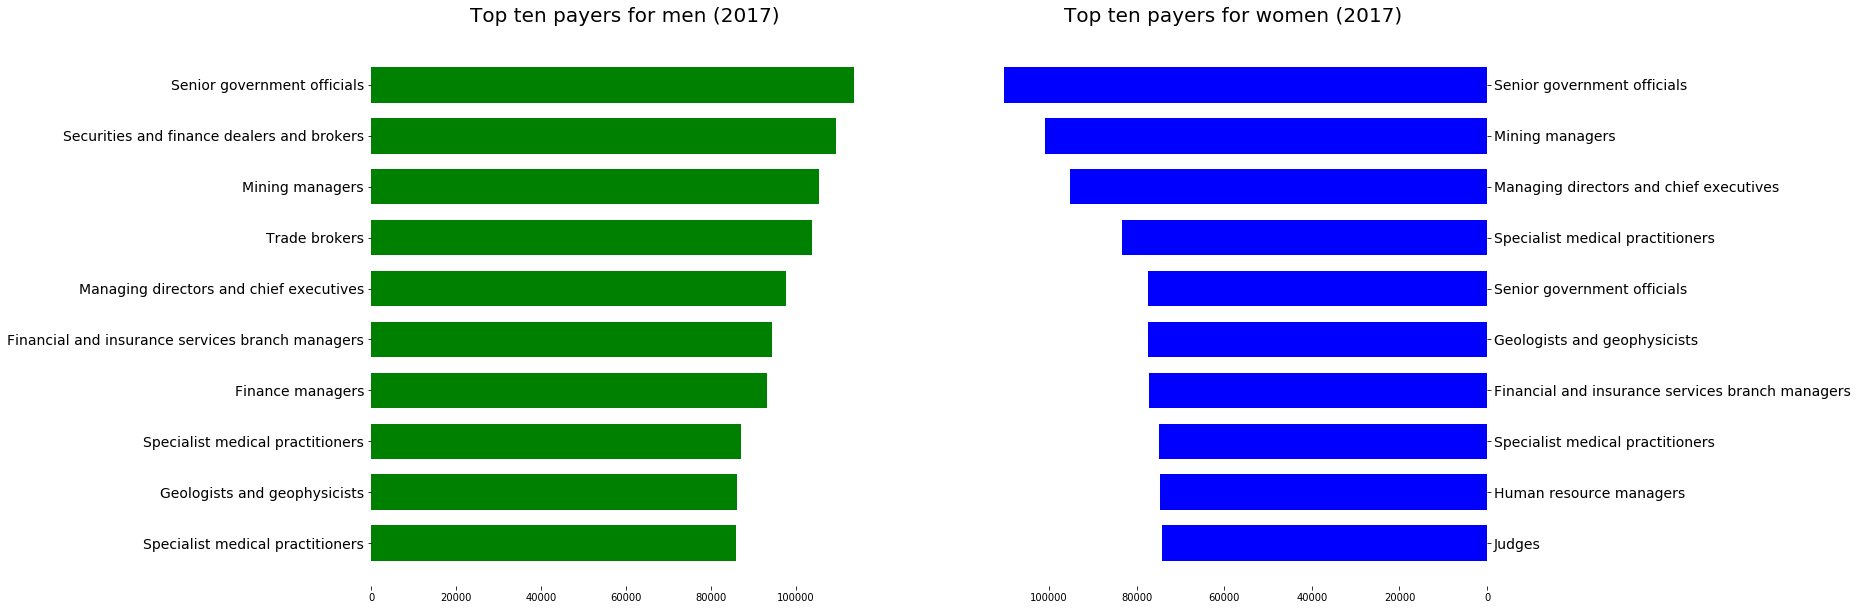

In [13]:
#What are top ten payers for men and women in 2017
# and plot horizontal bar for each sex
fig,(ax1,ax2)=plt.subplots(1,2,sharey=False,sharex=False,figsize=(20,10))
men_top_10_payers_2017=final.nlargest(10,'men_2017',keep='first')[['job','men_2017']]
col_names_m2017=list(men_top_10_payers_2017['job'])
bar_width_m2017=men_top_10_payers_2017['men_2017']
bar_positions=np.arange(10)+1
tick_positions=range(1,11)
ax1.barh(bar_positions,bar_width_m2017,0.7, color='g')
ax1.set_yticks(tick_positions)
ax1.set_yticklabels(col_names_m2017,size=14)
ax1.set_xlabel('Top ten payers for men (2017)', size=20)
ax1.xaxis.set_label_position('top')
#padding to the axis title
ax1.xaxis.labelpad = 20
ax1.invert_yaxis()
#Turn of axis spines 
for loc, spine in ax1.spines.items():
    if loc in ['left','bottom','right','top']:
        spine.set_visible(False)
#add similar plot for women
wom_top_10_payers_2017=final.nlargest(10,'wom_2017',keep='first')[['job','wom_2017']]
col_names_w2017=list(wom_top_10_payers_2017['job'])
bar_width_w2017=wom_top_10_payers_2017['wom_2017']
ax2.barh(bar_positions,bar_width_w2017,0.7, color='b')
ax2.set_yticks(tick_positions)
ax2.set_yticklabels(col_names_w2017,size=14)
ax2.yaxis.tick_right()
ax2.set_xlabel('Top ten payers for women (2017)', size=20)
ax2.xaxis.set_label_position('top')
ax2.xaxis.labelpad = 20
ax2.invert_yaxis()
ax2.invert_xaxis()
for loc, spine in ax2.spines.items():
    if loc in ['left','bottom','right','top']:
        spine.set_visible(False)
plt.savefig(r'location\highest_payers_men_wom2017.png',bbox_inches = 'tight')
plt.show


<function matplotlib.pyplot.show>

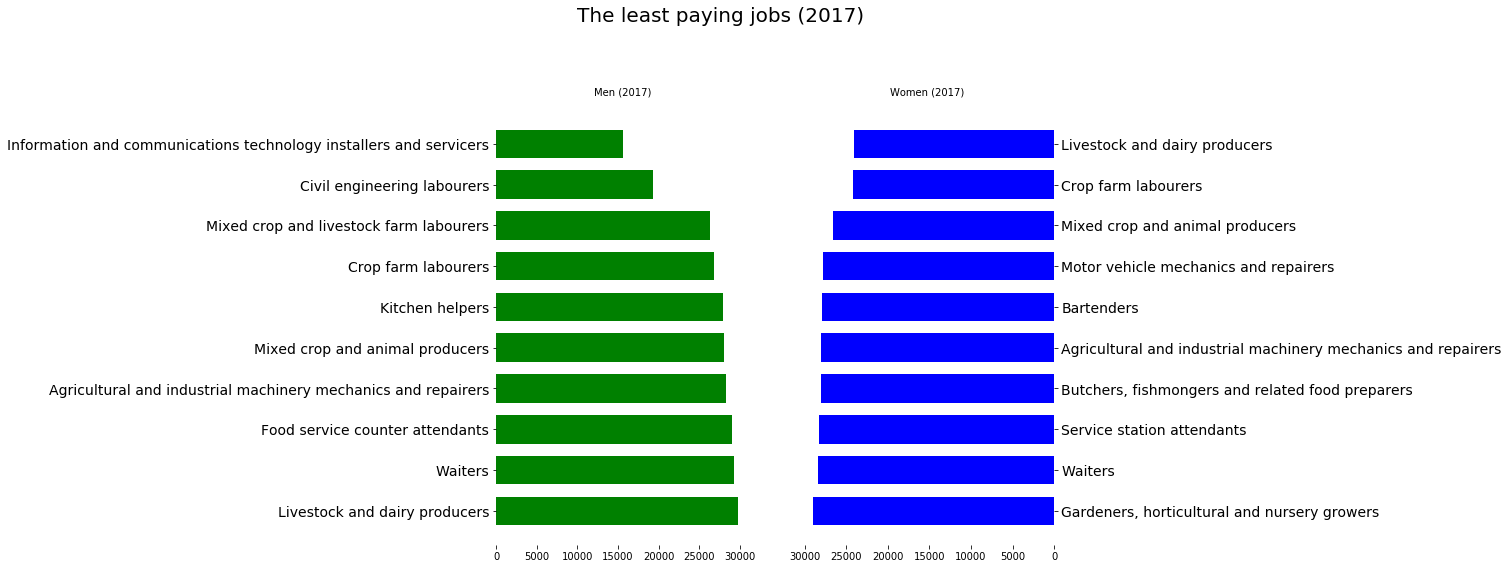

In [14]:
#What are the least payers for men and women in 2017
# and plot horizontal bar for each sex
fig,(ax1,ax2)=plt.subplots(1,2,sharey=False,sharex=False,figsize=(10,8))
men_top_10_payers_2017=final.nsmallest(10,'men_2017',keep='first')[['job','men_2017']]
col_names_m2017=list(men_top_10_payers_2017['job'])
bar_width_m2017=men_top_10_payers_2017['men_2017']
bar_positions=np.arange(10)+1
tick_positions=range(1,11)
ax1.barh(bar_positions,bar_width_m2017,0.7, color='g')
ax1.set_yticks(tick_positions)
ax1.set_yticklabels(col_names_m2017,size=14)
ax1.set_xlabel('Men (2017)')
ax1.text(10000,-2,'The least paying jobs (2017)',size=20)
ax1.xaxis.set_label_position('top')
#padding to the axis title
ax1.xaxis.labelpad = 15
ax1.invert_yaxis()
for loc, spine in ax1.spines.items():
    if loc in ['left','bottom','right','top']:
        spine.set_visible(False)
#add similar plot for women
#ax.axis('off')
wom_top_10_payers_2017=final.nsmallest(10,'wom_2017',keep='first')[['job','wom_2017']]
col_names_w2017=list(wom_top_10_payers_2017['job'])
bar_width_w2017=wom_top_10_payers_2017['wom_2017']
ax2.barh(bar_positions,bar_width_w2017,0.7, color='b')
ax2.set_yticks(tick_positions)
ax2.set_yticklabels(col_names_w2017,size=14)
ax2.yaxis.tick_right()
ax2.set_xlabel('Women (2017)')
ax2.xaxis.set_label_position('top') 
ax2.xaxis.labelpad = 15
ax2.invert_yaxis()
ax2.invert_xaxis()
for loc, spine in ax2.spines.items():
    if loc in ['left','bottom','right','top']:
        spine.set_visible(False)
plt.savefig(r'location\lowest_payers_men_wom2017.png',bbox_inches = 'tight')
plt.show


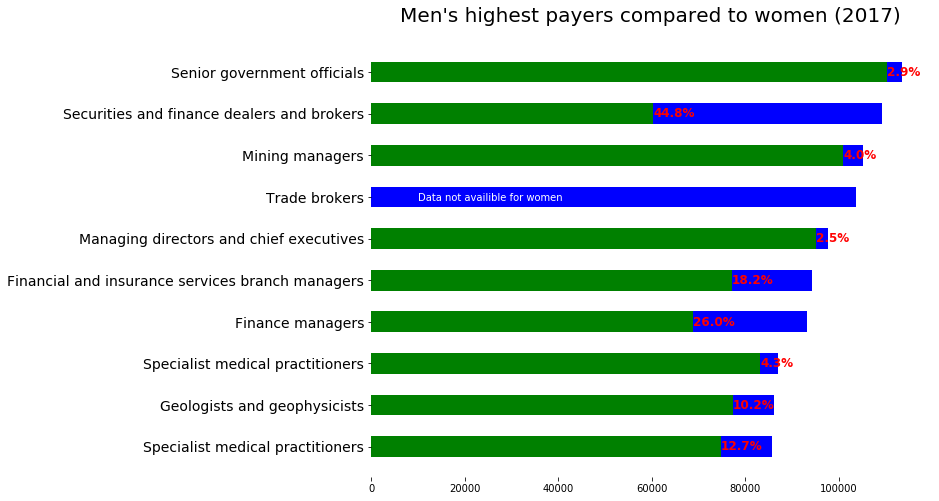

In [15]:
men_top10_payers_2017=final.nlargest(10,'men_2017',keep='first')[['job','men_2017','wom_2017']]
men_top10_payers_2017['percentage_diff']=men_top10_payers_2017['men_2017']-men_top10_payers_2017['wom_2017']
men_top10_payers_2017['percentage_diff']=(men_top10_payers_2017['percentage_diff']/men_top10_payers_2017['men_2017'])*100
men_top10_payers_2017['percentage_diff']=men_top10_payers_2017['percentage_diff'].round(1)
fig,ax=plt.subplots(1,sharey=False,figsize=(10,8))
#ax = fig.add_subplot(111)
col_names_m2017=list(men_top10_payers_2017['job'])
bar_width_men_2017=men_top10_payers_2017['men_2017']
bar_width_wom_2017=men_top10_payers_2017['wom_2017']
bar_positions=np.arange(10)+1
tick_positions=range(1,11)
ax.barh(bar_positions,bar_width_men_2017,0.5, color='b') # plot here
for loc, spine in ax.spines.items():
    if loc in ['left','bottom','right','top']:
        spine.set_visible(False)
#ax.minorticks_off()
ax.barh(bar_positions,bar_width_wom_2017,0.5, color='g') # plot here
ax.set_yticks(tick_positions)
ax.set_yticklabels(col_names_m2017,size=14)
ax.set_xlabel('Men\'s highest payers compared to women (2017)',size=20)
ax.xaxis.set_label_position('top') 
ax.xaxis.labelpad = 20
ax.invert_yaxis()
ax.text(10000,4.1,'Data not availible for women',color='w')
l=list(men_top10_payers_2017['wom_2017'].values)
for i, p in enumerate(men_top10_payers_2017['percentage_diff']):
    if pd.isnull(l[i]):
        c=0
        ax1.text(s=c, x=c, y=i+1, color="g", verticalalignment="center", size=18)
    else:
        ax.text(s=str(p)+"%", x=(l[i]), y=i+1, color="r",weight='bold',verticalalignment="center", size=12)
plt.savefig(r'location\highest_payers_men2017.png',bbox_inches = 'tight')
plt.show()
